<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/keras_functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/keras_functional.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Last amended: 16th Jan, 2021
# Ref: Hands-On Machine Learningwith Scikit-Learn, Keras, and TensorFlow by Aurelien Geron
#      Page: 308-312
# Using keras functional API

In [ ]:
# 1.0 Import libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import tensorflow/keras 
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [ ]:
# 1.1 Display multiple outputs from a Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# 2.0 Get Data
#     The data needs little processing
housing = fetch_california_housing(return_X_y= False)
type(housing)   # sklearn.utils.Bunch

sklearn.utils.Bunch

In [ ]:
# 2.1 Seperate X,y
X = housing.data
y = housing.target
X.shape   # (20640, 8)

(20640, 8)

In [ ]:
# 2.2 Normalize input data
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
# 2.3 Show data field names
print(housing.DESCR)
housing.feature_names

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
# 3.0 Split train/test data
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape   # (16512, 8)
X_test.shape    # (4128, 8)

(16512, 8)

(4128, 8)

# Wide and Deep Network--Ist version

In [ ]:
# 3.1 Design model

# 3.1.1 Inputs to model. Note that inputs is NOT
#       a part of layers object
inputs = tf.keras.Input(shape = X.shape[1:])
# 3.1.2 Add layers
x = layers.Dense(100, activation = 'relu')(inputs)
x = layers.Dense(100, activation = 'relu')(x)
x = tf.keras.layers.concatenate([x,inputs])
out = layers.Dense(1,activation = 'sigmoid')(x)
# 3.1.3 Create model now
model = Model(inputs = [inputs], outputs = [out])

In [ ]:
# 3.2 Print model summary
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 100)          900         input_14[0][0]                   
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 100)          10100       dense_25[0][0]                   
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, 108)          0           dense_26[0][0]                   
                                                                 input_14[0][0]             

In [ ]:
# 3.3 `Model` groups layers into an object 
#       with training and inference features.
help(Model)

Help on class Model in module tensorflow.python.keras.engine.training:

class Model(tensorflow.python.keras.engine.base_layer.Layer, tensorflow.python.keras.utils.version_utils.ModelVersionSelector)
 |  `Model` groups layers into an object with training and inference features.
 |  
 |  Arguments:
 |      inputs: The input(s) of the model: a `keras.Input` object or list of
 |          `keras.Input` objects.
 |      outputs: The output(s) of the model. See Functional API example below.
 |      name: String, the name of the model.
 |  
 |  There are two ways to instantiate a `Model`:
 |  
 |  1 - With the "Functional API", where you start from `Input`,
 |  you chain layer calls to specify the model's forward pass,
 |  and finally you create your model from inputs and outputs:
 |  
 |  ```python
 |  import tensorflow as tf
 |  
 |  inputs = tf.keras.Input(shape=(3,))
 |  x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
 |  outputs = tf.keras.layers.Dense(5, activation=tf.nn.soft

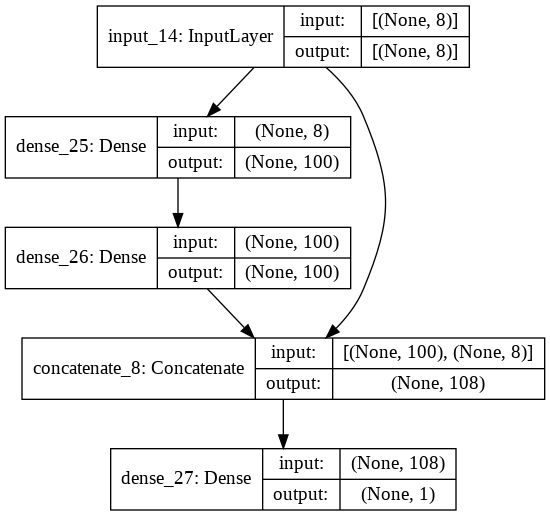

In [ ]:
# 3.4 Display model now
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model
plot_model(model, show_shapes= True)

In [ ]:
# 3.5 Compile model
model.compile(loss = "mean_squared_error")
history = model.fit(
                    X_train,
                    y_train,
                    epochs = 10,
                    verbose = 1
                    )

Epoch 1/10
516/516 [==============================] - 1s 1ms/step - loss: 2.5214
Epoch 2/10
516/516 [==============================] - 1s 1ms/step - loss: 2.4380
Epoch 3/10
516/516 [==============================] - 1s 1ms/step - loss: 2.5411
Epoch 4/10
516/516 [==============================] - 1s 1ms/step - loss: 2.4837
Epoch 5/10
516/516 [==============================] - 1s 1ms/step - loss: 2.4958
Epoch 6/10
516/516 [==============================] - 1s 1ms/step - loss: 2.4681
Epoch 7/10
516/516 [==============================] - 1s 1ms/step - loss: 2.4758
Epoch 8/10
516/516 [==============================] - 1s 1ms/step - loss: 2.4888
Epoch 9/10
516/516 [==============================] - 1s 1ms/step - loss: 2.4339
Epoch 10/10
516/516 [==============================] - 1s 1ms/step - loss: 2.4660


In [ ]:
3.6 model.evaluate(X_test,y_test)

129/129 [==============================] - 0s 863us/step - loss: 2.4378


2.4377660751342773

# Wide and Deep Network--IInd version

In [ ]:
# 4.0 We have two inputs
inputsA = tf.keras.Input(shape = X_train[:,:4].shape[1:])
inputsB = tf.keras.Input(shape = X_train[:,1:8].shape[1:])

In [ ]:
# 4.1 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)


In [ ]:
# 4.2 Concatenate one input with output of another arm
concat = layers.concatenate([x,inputsA])

In [ ]:
# 4.3 Output layer
out = layers.Dense(1,activation = 'sigmoid')(concat)


In [ ]:
# 4.4 Create model and show summary
model2 = Model(inputs = [inputsA,inputsB], outputs = [out])
model2.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 7)]          0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 100)          800         input_18[0][0]                   
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 100)          10100       dense_28[0][0]                   
__________________________________________________________________________________________________
input_17 (InputLayer)           [(None, 4)]          0                                            
____________________________________________________________________________________________

In [ ]:
# 4.5 Compile model
model2.compile(
               optimizer='rmsprop', 
               loss = 'mean_squared_error'
               )

# 4.6 Train the model now.
#     Note the two train inputs
model2.fit(
            [X_train[:,:4], X_train[:,1:8]],
            y_train,
            epochs = 100
           )

Epoch 1/100
516/516 [==============================] - 1s 1ms/step - loss: 2.6578
Epoch 2/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4948
Epoch 3/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4901
Epoch 4/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4797
Epoch 5/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4541
Epoch 6/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4691
Epoch 7/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4731
Epoch 8/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4998
Epoch 9/100
516/516 [==============================] - 1s 1ms/step - loss: 2.5091
Epoch 10/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4542
Epoch 11/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4512
Epoch 12/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4789
Epoch 13/100


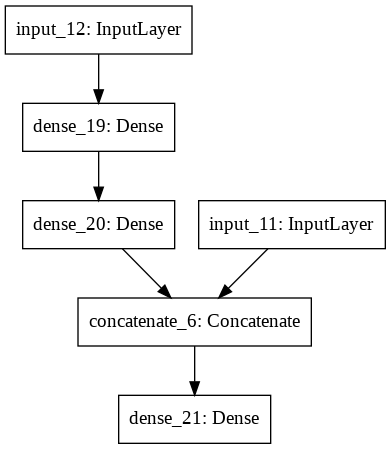

In [ ]:
# 4.7 Plot our model
plot_model(model2)

# Two inputs and two outputs model--IIIrd ver

In [ ]:
# 5.0 We have two inputs.
#     To distiguish them, we give names to each
inputsA = tf.keras.Input(
                          shape = X_train[:,:4].shape[1:],
                          name = "in_a"
                         )

# 5.1
inputsB = tf.keras.Input(
                          shape = X_train[:,1:8].shape[1:],
                          name = "in_b"
                        )


# 5.2 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)

# 5.3 Concatenate an input with output of one arm
concat = layers.concatenate([x,inputsA])

# 5.4 Output layers
#     We have two output layers. To distiguish them, we give names to each
out_x = layers.Dense(1,activation = 'sigmoid' , name = "out_a")(concat)
out_y = layers.Dense(1,activation = 'sigmoid', name = "out_b")(x)

# 5.5 Create model and show summary
#     While outputs are two, model is one
main_model = Model(inputs = [inputsA,inputsB], outputs = [out_x, out_y])
main_model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
in_b (InputLayer)               [(None, 7)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          800         in_b[0][0]                       
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          10100       dense[0][0]                      
__________________________________________________________________________________________________
in_a (InputLayer)               [(None, 4)]          0                                            
______________________________________________________________________________________________

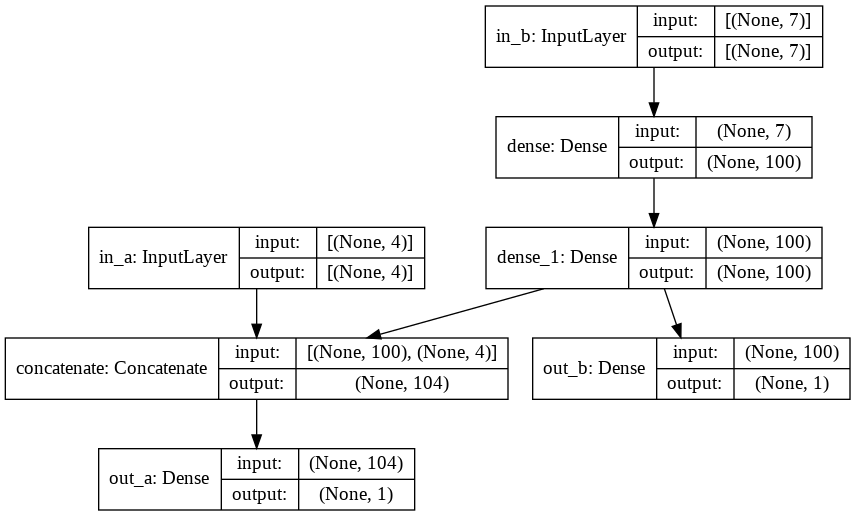

In [ ]:
# 5.6 Plot the model now
plot_model(main_model, show_shapes = True)

In [ ]:
help(Model)

Help on class Model in module tensorflow.python.keras.engine.training:

class Model(tensorflow.python.keras.engine.base_layer.Layer, tensorflow.python.keras.utils.version_utils.ModelVersionSelector)
 |  `Model` groups layers into an object with training and inference features.
 |  
 |  Arguments:
 |      inputs: The input(s) of the model: a `keras.Input` object or list of
 |          `keras.Input` objects.
 |      outputs: The output(s) of the model. See Functional API example below.
 |      name: String, the name of the model.
 |  
 |  There are two ways to instantiate a `Model`:
 |  
 |  1 - With the "Functional API", where you start from `Input`,
 |  you chain layer calls to specify the model's forward pass,
 |  and finally you create your model from inputs and outputs:
 |  
 |  ```python
 |  import tensorflow as tf
 |  
 |  inputs = tf.keras.Input(shape=(3,))
 |  x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
 |  outputs = tf.keras.layers.Dense(5, activation=tf.nn.soft

In [ ]:
help(main_model.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of tensorflow.python.keras.engine.functional.Functional instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return

In [ ]:
# 6.0 Compile model now
# Ref: Model.compile: 
#      https://wwwa.tensorflow.org/api_docs/python/tf/keras/Model

main_model.compile(
                     loss = ['mse', 'mse'],        # Could also be in dict() format
                     metrics = "mse",
                     loss_weights= {"out_a": 0.9,   # More weight to error here
                                    "out_b" : 0.1   # Less weight to error here
                                    }
                   )

In [ ]:
# 6.1
main_model.fit(
               {                            #[X_train[:,:4],X_train[:,1:8]]
                   "in_a" : X_train[:,:4],  # One input
                   "in_b" : X_train[:,1:8]  # IInd input     
               },              
               [y_train,y_train],
               epochs = 100
           )

Epoch 1/100
516/516 [==============================] - 2s 1ms/step - loss: 2.5911 - out_a_loss: 2.5820 - out_b_loss: 2.6737 - out_a_mse: 2.5820 - out_b_mse: 2.6737
Epoch 2/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4350 - out_a_loss: 2.4350 - out_b_loss: 2.4350 - out_a_mse: 2.4350 - out_b_mse: 2.4350
Epoch 3/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4574 - out_a_loss: 2.4574 - out_b_loss: 2.4574 - out_a_mse: 2.4574 - out_b_mse: 2.4574
Epoch 4/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4582 - out_a_loss: 2.4582 - out_b_loss: 2.4582 - out_a_mse: 2.4582 - out_b_mse: 2.4582
Epoch 5/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4532 - out_a_loss: 2.4532 - out_b_loss: 2.4533 - out_a_mse: 2.4532 - out_b_mse: 2.4533
Epoch 6/100
516/516 [==============================] - 1s 1ms/step - loss: 2.4427 - out_a_loss: 2.4427 - out_b_loss: 2.4428 - out_a_mse: 2.4427 - out_b_mse: 2.4428
Epoch 7/100
516/

In [ ]:
# 6.2 One can also write outputs in a dictionary form, as:

main_model.fit(
               {                            #[X_train[:,:4],X_train[:,1:8]]
                   "in_a" : X_train[:,:4],  # One input
                   "in_b" : X_train[:,1:8]  # IInd input     
               },              
               {
                   "out_a" : y_train,
                   "out_b" : y_train
               },
               epochs = 100
           )

Epoch 1/100
516/516 [==============================] - 1s 2ms/step - loss: 2.4699 - out_a_loss: 2.4699 - out_b_loss: 2.4702 - out_a_mse: 2.4699 - out_b_mse: 2.4702
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 2.4699 - out_a_loss: 2.4698 - out_b_loss: 2.4701 - out_a_mse: 2.4698 - out_b_mse: 2.4701
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 2.4698 - out_a_loss: 2.4698 - out_b_loss: 2.4701 - out_a_mse: 2.4698 - out_b_mse: 2.4701
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 2.4698 - out_a_loss: 2.4698 - out_b_loss: 2.4700 - out_a_mse: 2.4698 - out_b_mse: 2.4700
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 2.4699 - out_a_loss: 2.4699 - out_b_loss: 2.4701 - out_a_mse: 2.4699 - out_b_mse: 2.4701
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 2.4698 - out_a_loss: 2.4698 - out_b_loss: 2.4701 - out_a_mse: 2.4698 - out_b_mse: 2.4701
Epoch 7/100
516/

In [ ]:
# 7.0 To evaluate, we must also supply two inputs
main_model.evaluate(
                     [X_test[:,:4],X_test[:,1:8]],
                      y_test
                    )

129/129 [==============================] - 0s 1ms/step - loss: 2.4382 - out_a_loss: 2.4382 - out_b_loss: 2.4385 - out_a_mse: 2.4382 - out_b_mse: 2.4385


[2.438199758529663,
 2.4381649494171143,
 2.43851637840271,
 2.4381649494171143,
 2.43851637840271]

In [ ]:
########### It is done ##############